# Image Compression

In this notebook, we use SVD to compute a low-rank approximation to a given image (aka matrix). Below, we demonstrate the pipeline to obtain various approximations for grayscale and color images.

Import Statements

In [1]:
from matplotlib.image import imread # To load the image
import matplotlib.pyplot as plt
import numpy as np

# Size of image to plot
plt.rcParams['figure.figsize'] = [5,5]

### Black and White

First, we demonstrate our approximation for a black and white image

In [20]:
image_path = 'images/heart/heart.png'

In [21]:
# Converts the original image to numpy array
if image_path.endswith(".jpeg") or image_path.endswith(".jpg"):
  # normalize to [0, 1]
  image = imread(image_path).astype(float) / 255.0
else:
  image = imread(image_path)

if len(image.shape) == 3:
    # Convert RGB to grayscale
    X = np.mean(image, axis=-1)
else:
    X = image

parameters = X.shape[0] * X.shape[1]
print(f"Image Shape: {X.shape}")
print(f"Parameters in Original Image: {parameters}")

Image Shape: (28, 28)
Parameters in Original Image: 784


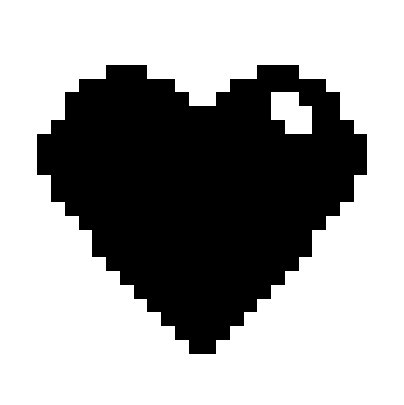

In [22]:
# Display the uncompressed image (in black and white)
img = plt.imshow(X)
img.set_cmap('gray') #simply just changing the BG
plt.axis('off')
plt.show()

In [23]:
# Compute the SVD
U, S, VT = np.linalg.svd(X, full_matrices = False)
# Note: SVD returns Sigma as a list of values, not a diagonal matrix, for efficiency.
threshold = 1e-10
S = np.where(S > threshold, S, 0.0) # Avoids numerical errors for small numbers

print(f"U: {U.shape}, S: {S.shape}, Vt: {VT.shape}")
print(f"Rank: {np.linalg.matrix_rank(X)}")
print("Singular Values (Sigma):")
print(np.round(S, 2))

U: (28, 28), S: (28,), Vt: (28, 28)
Rank: 16
Singular Values (Sigma):
[20.98  4.51  3.09  2.56  1.92  1.48  1.32  1.09  0.95  0.77  0.68  0.66
  0.6   0.57  0.29  0.17  0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.  ]


(28, 1) (1, 1) (1, 28)


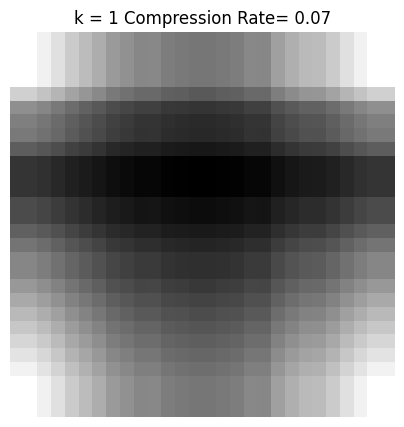

(28, 5) (5, 5) (5, 28)


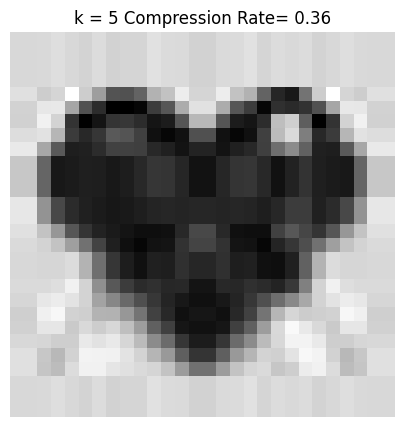

(28, 20) (20, 20) (20, 28)


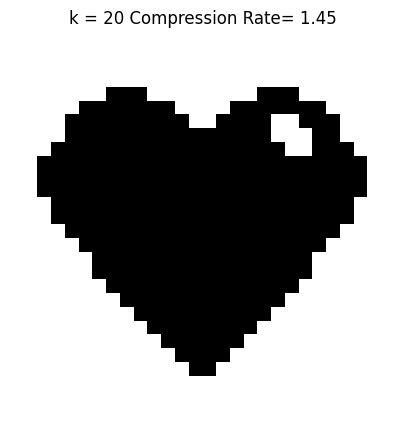

(28, 28) (28, 28) (28, 28)


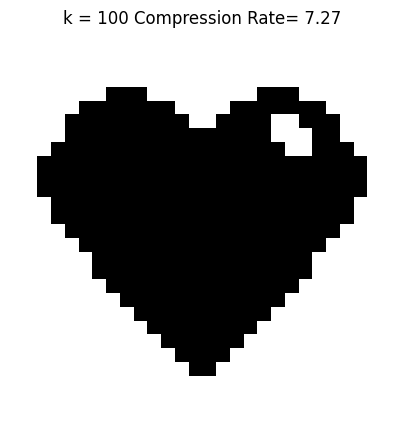

(28, 28) (28, 28) (28, 28)


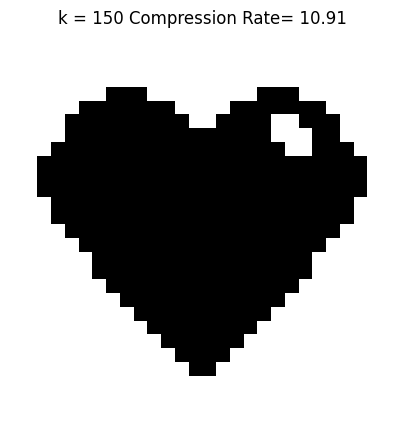

In [24]:
# Rank-k approximation for various rankings of k
k_approx = [1, 5, 20, 100, 150]

if len(S.shape) == 1:
  S = np.diag(S)
for k in k_approx:
  # Extract the top-k components
  U_k = U[:, :k]        # First k columns of U (m x k)
  S_k = S[0:k, 0:k]           # First k singular values (k x k)
  Vt_k = VT[:k, :]      # First k rows of Vt (k x n)
  print(U_k.shape, S_k.shape, Vt_k.shape)
  Xapprox = U_k @ S_k @ Vt_k

  compressed_parameters = k * (X.shape[0] + 1 + X.shape[1])
  space_saved = (parameters - compressed_parameters) / parameters
  compression_ratio = compressed_parameters / (parameters)

  img = plt.imshow(Xapprox)
  img.set_cmap('gray')
  plt.title('k = {} Compression Rate= {}'.format(k,round(compression_ratio,2)))
  plt.axis('off')
  plt.show()

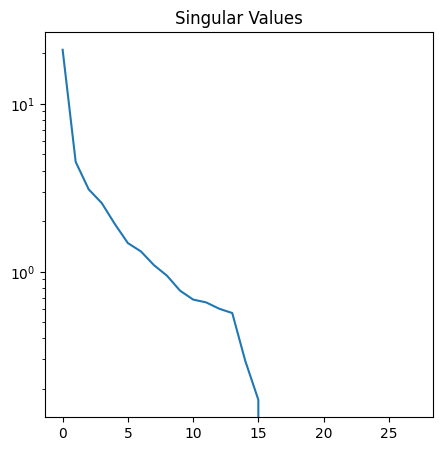

In [25]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

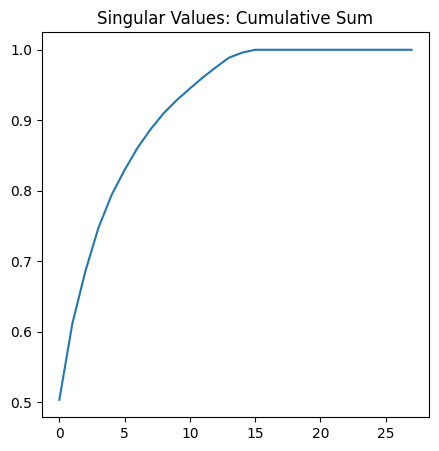

In [26]:
plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title("Singular Values: Cumulative Sum")
plt.show()

Save the U, S, Vt as numpy arrays

In [27]:
S_list = S.diagonal() # Only need the singular vectors
np.save('U.npy', U)
np.save('S.npy', S_list)
np.save('Vt.npy', VT)

In [ ]:
U = np.load('U.npy')
S_list = np.load('S.npy')
S = np.diag(S_list)
VT = np.load('Vt.npy')

print(f"U: {U.shape}, S: {S.shape}, Vt: {VT.shape}")
print(f"Rank: {np.linalg.matrix_rank(X)}")
print("Singular Values (Sigma):")
print(np.round(S, 2))

U: (28, 28), S: (28,), Vt: (28, 28)
Rank: 16
Singular Values (Sigma):
[20.98  4.51  3.09  2.56  1.92  1.48  1.32  1.09  0.95  0.77  0.68  0.66
  0.6   0.57  0.29  0.17  0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.  ]


## Color

Another example for a colorized image

In [242]:
image_path = 'images/hisham/hisham.jpg'

In [243]:
# Converts the original image to numpy array
if image_path.endswith(".jpeg") or image_path.endswith(".jpg"):
  # normalize to [0, 1]
  X = imread(image_path).astype(float) / 255.0
else:
  X = imread(image_path)

parameters = X.shape[0] * X.shape[1] * X.shape[2]
print(f"Image Shape: {X.shape}")
print(f"Parameters in Original Image: {parameters}")

Image Shape: (1535, 2047, 3)
Parameters in Original Image: 9426435


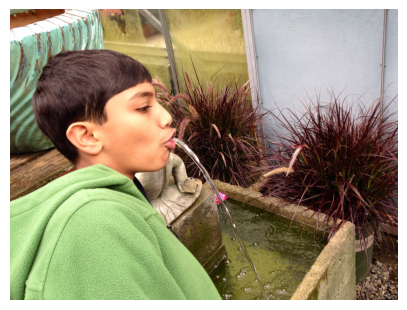

In [244]:
# Display the uncompressed image
img = plt.imshow(X)
plt.axis('off')
plt.show()

In [245]:
# Compute the SVD separately along each color dimension
U1, S1, VT1 = np.linalg.svd(X[:, :, 0], full_matrices = False) # Red
U2, S2, VT2 = np.linalg.svd(X[:, :, 1], full_matrices = False) # Green
U3, S3, VT3 = np.linalg.svd(X[:, :, 2], full_matrices = False) # Blue
# Note: SVD returns Sigma as a list of values, not a diagonal matrix, for efficiency.

print(f"U: {U1.shape}, S: {S1.shape}, Vt: {VT1.shape}")

U: (1535, 1535), S: (1535,), Vt: (1535, 2047)


(1535, 1) (1, 1) (1, 2047)


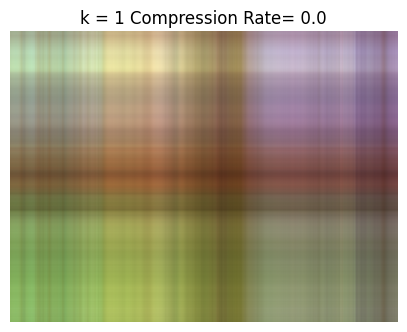

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14259411529123017..1.0896480883101551].


(1535, 5) (5, 5) (5, 2047)


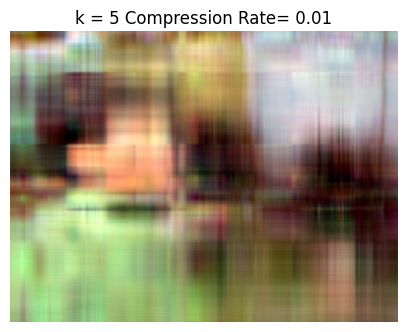

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1356382412683701..1.1422105375473761].


(1535, 20) (20, 20) (20, 2047)


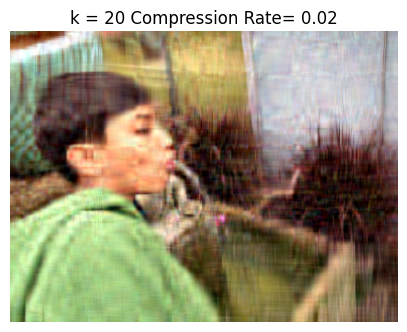

(1535, 100) (100, 100) (100, 2047)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15190555990105503..1.1199666859184192].


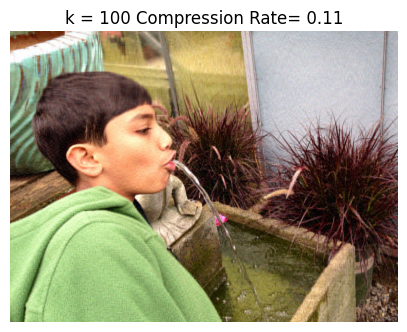

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13288776034326014..1.109546537666454].


(1535, 150) (150, 150) (150, 2047)


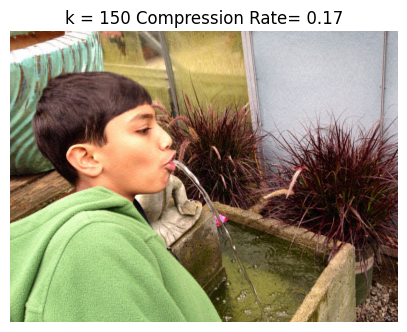

(1535, 500) (500, 500) (500, 2047)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06156659683966606..1.059949198407697].


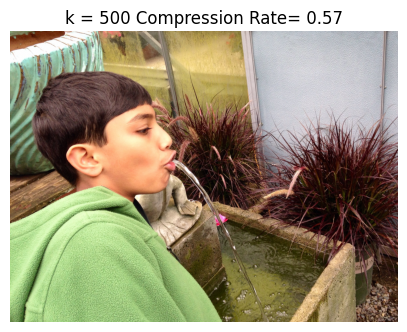

In [246]:
# Rank-k approximation for various rankings of k
k_approx = [1, 5, 20, 100, 150, 500]

if len(S1.shape) == 1:
  S1 = np.diag(S1)
if len(S2.shape) == 1:
  S2 = np.diag(S2)
if len(S3.shape) == 1:
  S3 = np.diag(S3)

for k in k_approx:
  # Extract the top-k components
  U1_k, S1_k, Vt1_k = U1[:, :k], S1[0:k, 0:k], VT1[:k, :]
  U2_k, S2_k, Vt2_k = U2[:, :k], S2[0:k, 0:k], VT2[:k, :]
  U3_k, S3_k, Vt3_k = U3[:, :k], S3[0:k, 0:k], VT3[:k, :]

  print(U1_k.shape, S1_k.shape, Vt1_k.shape)
  X1_approx = U1_k @ S1_k @ Vt1_k
  X2_approx = U2_k @ S2_k @ Vt2_k
  X3_approx = U3_k @ S3_k @ Vt3_k

  Xapprox = np.stack([X1_approx, X2_approx, X3_approx], axis=2)

  compressed_parameters = k * 3 * (X.shape[0] + 1 + X.shape[1])
  space_saved = (parameters - compressed_parameters) / parameters
  compression_ratio = compressed_parameters / (parameters)

  img = plt.imshow(Xapprox)
  img.set_cmap('gray')
  plt.title('k = {} Compression Rate= {}'.format(k,round(compression_ratio,2)))
  plt.axis('off')
  plt.show()

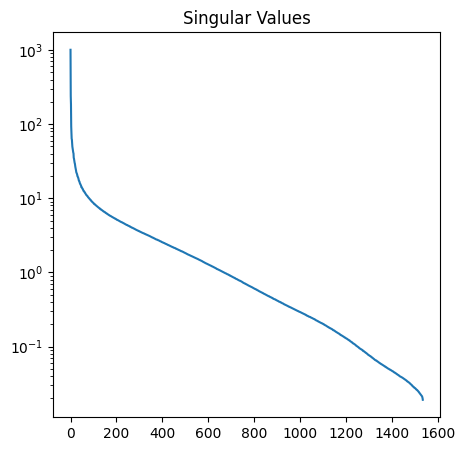

In [247]:
plt.figure(1)
plt.semilogy(np.diag(S1))
plt.title('Singular Values')
plt.show()

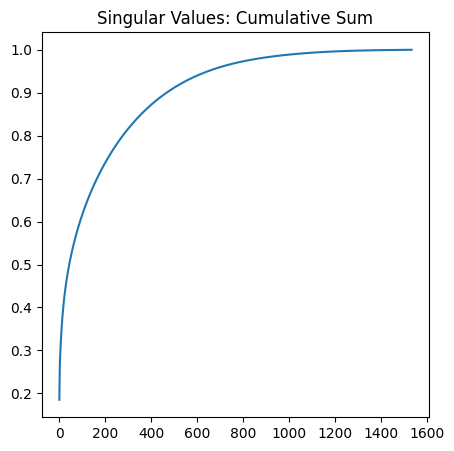

In [248]:
plt.figure(2)
plt.plot(np.cumsum(np.diag(S1))/np.sum(np.diag(S1)))
plt.title("Singular Values: Cumulative Sum")
plt.show()

Save U, S, Vt for each of RGB colors as numpy arrays

In [249]:
# Red
np.save('U1.npy', U1)
np.save('S1.npy', S1)
np.save('Vt1.npy', VT1)

# Green
np.save('U2.npy', U2)
np.save('S2.npy', S2)
np.save('Vt2.npy', VT2)

# Blue
np.save('U3.npy', U3)
np.save('S3.npy', S3)
np.save('Vt3.npy', VT3)

In [205]:
U1, S1, VT1 = np.load('U1.npy'), np.load('S1.npy'), np.load('Vt1.npy')
U2, S2, VT2 = np.load('U2.npy'), np.load('S2.npy'), np.load('Vt2.npy')
U3, S3, VT3 = np.load('U3.npy'), np.load('S3.npy'), np.load('Vt3.npy')

### Testing

In [29]:
S_list = np.load('S.npy')
print(S_list.shape)
print(S_list)

(28,)
[20.981417    4.5090914   3.0918076   2.5615366   1.923242    1.4804311
  1.3204895   1.0937105   0.94606644  0.770592    0.6823112   0.65616983
  0.6015416   0.56705034  0.29399672  0.17255522  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
